2. a) How about multiple linear regression (from scratch) analysis? Can you predict the phone's rating based on its pixel density, screen size, weight, RAM, processor frequency, screen-to-body ratio, height, internal memory, capacity, and resolution using 80-20 train-test split ratio? (Using gradient descent approach). 

b) What is the MSE for this model? Also explore R-squared (R2) error.


3. a) Can you visualise the relationship between the phone's rating and each of its features using scatter plots (Individual scatter plot for each feature)?
b)  Which features have a strong linear relationship with the rating, and which features appear to have little or no impact on the rating?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('mobile_data (1).csv')
df

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,Resolution,Rating
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,20,4.5
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,8,4.5
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,25,4.4
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,24,4.3
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,16,4.4
...,...,...,...,...,...,...,...,...,...,...,...,...
336,465,220,5.00,141,1,1.2,67.20,142.7,16,2420,5,3.8
337,466,401,5.50,165,4,1.8,69.95,156.5,64,3000,13,3.9
338,468,282,5.20,160,3,1.4,68.52,149.7,16,3000,8,4.1
339,470,218,4.50,156,1,1.3,63.93,132.0,8,1800,2,3.6


In [3]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [5]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split( x, y, test_size = 0.2,random_state=42)

In [6]:
def CostFunction(x,y,w,b):
    return np.sum((((x.dot(w) + b) - y) ** 2) / (2*len(y)))

In [10]:
def GradientDescent(x, y, w, b, alpha, ite):
    cost_list = [0] * ite
   
    for i in range(ite):
        z = x.dot(w) + b
        loss = z - y
        
        weight_gradient = x.T.dot(loss) / len(y)
        bias_gradient = np.sum(loss) / len(y)
        
        w = w - alpha*weight_gradient
        b = b - alpha*bias_gradient
  
        cost = CostFunction(x, y, w, b)
        cost_list[i] = cost
        
        if (i%(ite/10)==0):
            print("Cost is:",cost)
        
    return w, b, cost_list

In [17]:
w, b, c= GradientDescent(Xtrain, Ytrain, np.zeros(Xtrain.shape[1]), 0, 0.002,ite = 2000)

Cost is: 8.294550624146506
Cost is: 3.743061652731118
Cost is: 1.7108902849510557
Cost is: 0.7990835981418203
Cost is: 0.38851080251858044
Cost is: 0.20283961647098558
Cost is: 0.11841222522518982
Cost is: 0.0797467354386644
Cost is: 0.06187224395936823
Cost is: 0.053506673004717606


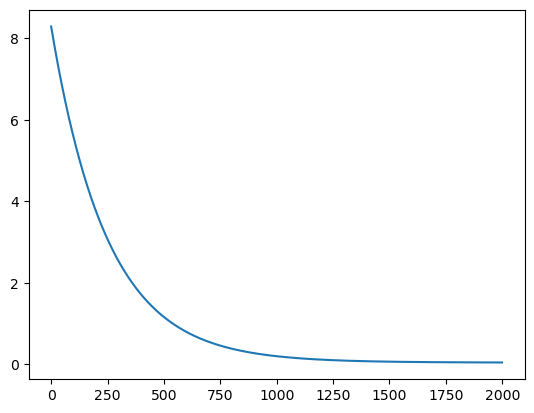

In [18]:
plt.plot(c)

In [19]:
def predict(X, w, b):
    return X.dot(w) + b
y_pred = predict(Xtest, w, b)

In [20]:
def r2score(y_pred, y):
    rss = np.sum((y_pred - y) ** 2)
    tss = np.sum((y-y.mean()) ** 2)
    return 1 - (rss / tss)
print("The r2 score of the predicted value is", r2score(y_pred, Ytest))

The r2 score of the predicted value is 0.2812646628195269


In [21]:
print("The MSE of the predicted and actual value is:", CostFunction(x,y,w,b))

The MSE of the predicted and actual value is: 0.05284807355286032


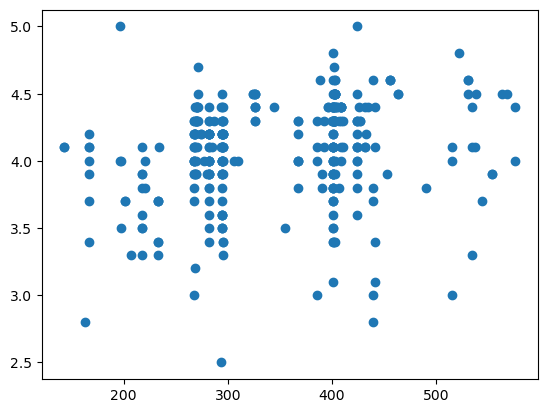

In [30]:
plt.scatter((df['Pixel Density']),df['Rating'])

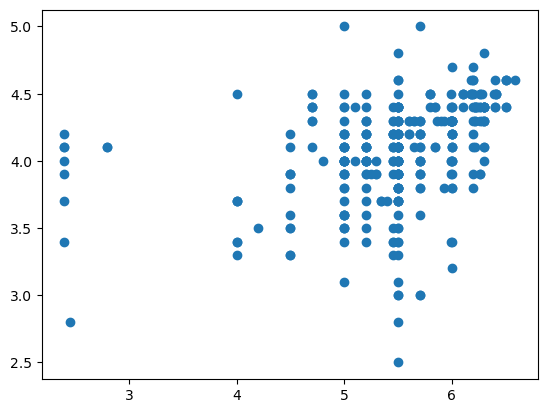

In [29]:
plt.scatter((df['Screen Size']),df['Rating'])

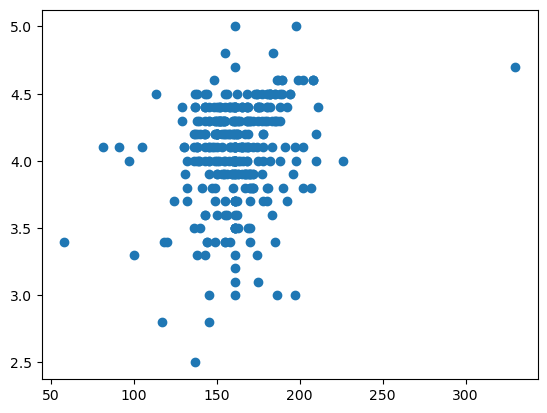

In [28]:
plt.scatter(df['Weight'],df['Rating'])

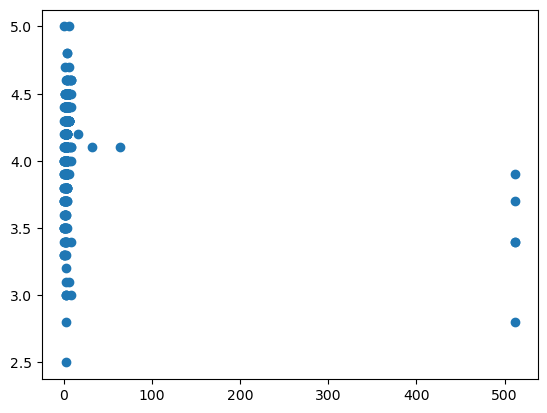

In [27]:
plt.scatter(df['RAM'], df['Rating'])

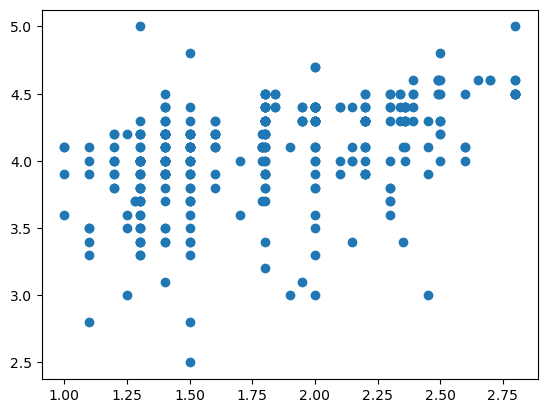

In [26]:
plt.scatter(df['Processor_frequency'],df['Rating'])

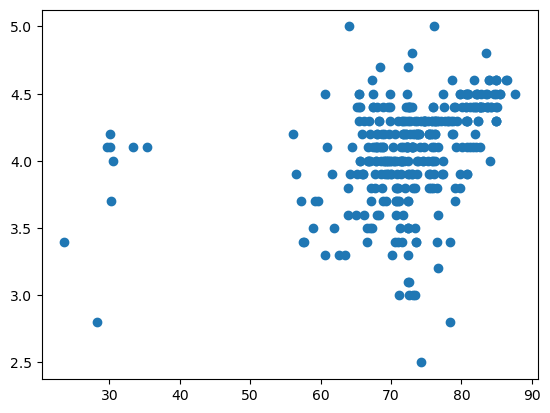

In [31]:
plt.scatter(df['Screen to Body Ratio (calculated)'],df['Rating'])

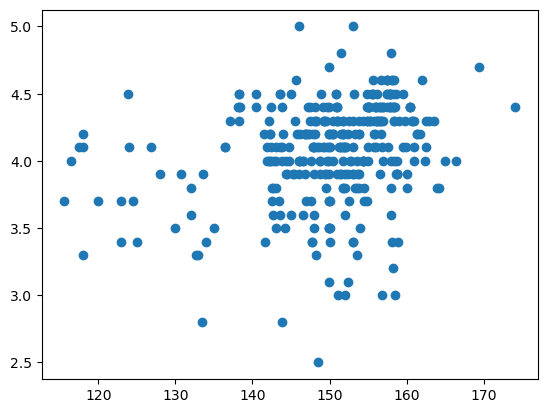

In [32]:
plt.scatter(df['Height'],df['Rating'])


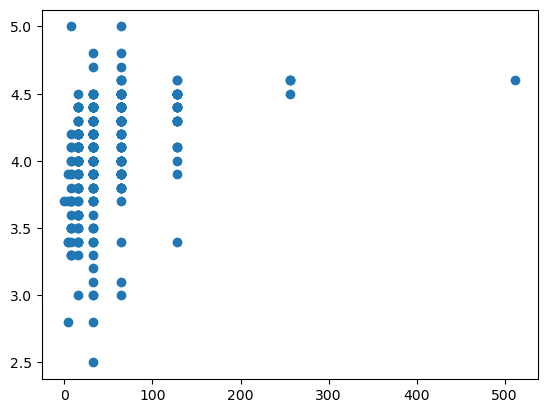

In [33]:
plt.scatter(df['Internal Memory'],df['Rating'])


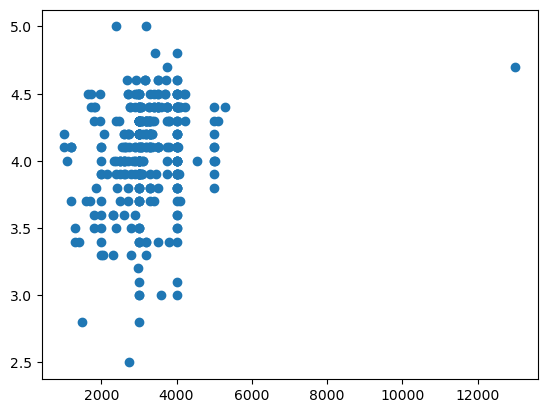

In [34]:
plt.scatter(df['Capacity'],df['Rating'])


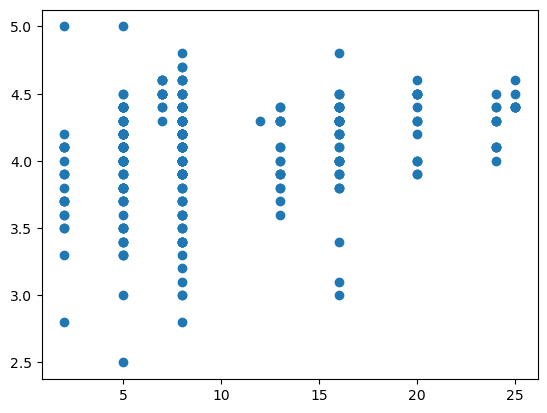

In [35]:
plt.scatter(df['Resolution'],df['Rating'])


From above graphs i think the "Capacity" and "Screen to body reatio" shows a almost linear variation with rating so we can say its showing high linear relatioinship

and it seems to be the "Ram" and "resolution" have less impact no it